# Problem statement.Recommend a best book based on the ratings.




In [44]:
import pandas as pd
import numpy as np
import scipy as sp 
import seaborn as sns 
import matplotlib as mpl
import matplotlib.pyplot as plt 
import pandas_profiling as pp

In [45]:
books_df= pd.read_csv('C:/Users/RajabhishekAditya/Downloads/recomedation assigment/book.csv',encoding='latin-1')
books_df.head()

,Unnamed: 0,UserID,BookTitle,BookRating
0,1,276726,Classical Mythology,5
1,2,276729,Clara Callan,3
2,3,276729,Decision in Normandy,6
3,4,276736,Flu: The Story of the Great Influenza Pandemic...,8
4,5,276737,The Mummies of Urumchi,6


In [46]:
books_df[0:5]

,Unnamed: 0,UserID,BookTitle,BookRating
0,1,276726,Classical Mythology,5
1,2,276729,Clara Callan,3
2,3,276729,Decision in Normandy,6
3,4,276736,Flu: The Story of the Great Influenza Pandemic...,8
4,5,276737,The Mummies of Urumchi,6


In [47]:
#Data Structure 
type(books_df)
books_df.shape

(10000, 4)

In [49]:
#data types
books_df.dtypes

Unnamed: 0     int64
UserID         int64
BookTitle     object
BookRating     int64
dtype: object

In [50]:
books_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  10000 non-null  int64 
 1   UserID      10000 non-null  int64 
 2   BookTitle   10000 non-null  object
 3   BookRating  10000 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 312.6+ KB


In [52]:
books_df

,Unnamed: 0,UserID,BookTitle,BookRating
0,1,276726,Classical Mythology,5
1,2,276729,Clara Callan,3
2,3,276729,Decision in Normandy,6
3,4,276736,Flu: The Story of the Great Influenza Pandemic...,8
4,5,276737,The Mummies of Urumchi,6
...,...,...,...,...
9995,9996,162121,American Fried: Adventures of a Happy Eater.,7
9996,9997,162121,Cannibal In Manhattan,9
9997,9998,162121,How to Flirt: A Practical Guide,7
9998,9999,162121,Twilight,8


<AxesSubplot:>

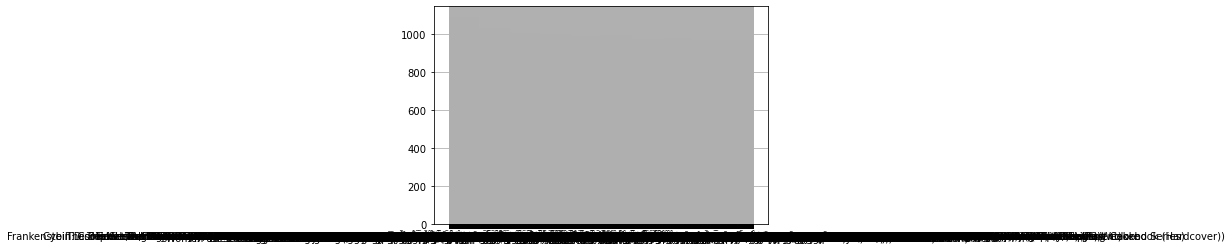

In [54]:
# histogram of Ozone
books_df['BookTitle'].hist()

<AxesSubplot:>

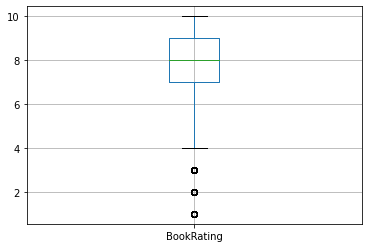

In [55]:
#Box plot
books_df.boxplot(column=['BookRating'])

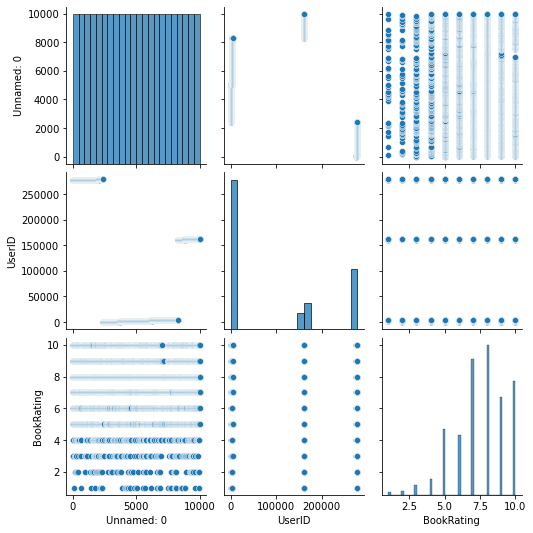

In [56]:
# Seaborn visualization library
import seaborn as sns
# Create the default pairplot
sns.pairplot(books_df)

In [5]:
#number of unique users in the dataset
len(books_df.UserID.unique())

2182

In [6]:
len(books_df.BookTitle.unique())

9659

In [9]:
books_df=books_df.drop_duplicates(subset=['UserID','BookRating'], keep='last')


In [10]:
user_books_df = books_df.pivot(index='UserID',
                                columns='BookTitle',
                                values='BookRating').reset_index(drop=True)

In [11]:
user_books_df

BookTitle,"Jason, Madison &amp",Other Stories;Merril;1985;McClelland &amp,Repairing PC Drives &amp,'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,"100 Great Fantasy Short, Short Stories",101 Bright Ideas: Esl Activities for All Ages,101 Dalmatians,101 Ways to Make Money at Home,11th Hour,13 99 Euros,...,Yuwipi: Vision and Experience in Oglala Ritual,Zeit im Wind.,Zen in the Art of Archery (Vintage Spiritual Classics),Zlateh the Goat and Other Stories,Zodiac: The Eco-Thriller,Zombies of the Gene Pool,Zoot Suit and Other Plays,Zora Hurston and the Chinaberry Tree (Reading Rainbow Book),"\Surely You're Joking, Mr. Feynman!\: Adventures of a Curious Character",stardust
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2177,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2178,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2179,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2180,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
user_books_df.index = books_df.UserID.unique()

In [14]:
user_books_df

BookTitle,"Jason, Madison &amp",Other Stories;Merril;1985;McClelland &amp,Repairing PC Drives &amp,'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,"100 Great Fantasy Short, Short Stories",101 Bright Ideas: Esl Activities for All Ages,101 Dalmatians,101 Ways to Make Money at Home,11th Hour,13 99 Euros,...,Yuwipi: Vision and Experience in Oglala Ritual,Zeit im Wind.,Zen in the Art of Archery (Vintage Spiritual Classics),Zlateh the Goat and Other Stories,Zodiac: The Eco-Thriller,Zombies of the Gene Pool,Zoot Suit and Other Plays,Zora Hurston and the Chinaberry Tree (Reading Rainbow Book),"\Surely You're Joking, Mr. Feynman!\: Adventures of a Curious Character",stardust
276726,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
276729,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
276736,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
276737,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
276744,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162107,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
162109,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
162113,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
162121,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
#Impute those NaNs with 0 values
user_books_df.fillna(0, inplace=True)

In [16]:
user_books_df

BookTitle,"Jason, Madison &amp",Other Stories;Merril;1985;McClelland &amp,Repairing PC Drives &amp,'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,"100 Great Fantasy Short, Short Stories",101 Bright Ideas: Esl Activities for All Ages,101 Dalmatians,101 Ways to Make Money at Home,11th Hour,13 99 Euros,...,Yuwipi: Vision and Experience in Oglala Ritual,Zeit im Wind.,Zen in the Art of Archery (Vintage Spiritual Classics),Zlateh the Goat and Other Stories,Zodiac: The Eco-Thriller,Zombies of the Gene Pool,Zoot Suit and Other Plays,Zora Hurston and the Chinaberry Tree (Reading Rainbow Book),"\Surely You're Joking, Mr. Feynman!\: Adventures of a Curious Character",stardust
276726,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276729,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276736,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276737,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276744,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162107,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
162109,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
162113,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
162121,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
#Calculating Cosine Similarity between Users
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import cosine, correlation

In [20]:
user_sim = 1 - pairwise_distances( user_books_df.values,metric='cosine')

In [21]:
user_sim

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [22]:
#Store the results in a dataframe
user_sim_df = pd.DataFrame(user_sim)

In [24]:
#Set the index and column names to user ids 
user_sim_df.index = books_df.UserID.unique()
user_sim_df.columns = books_df.UserID.unique()

In [28]:
user_sim_df.iloc[0:5, 0:5]

,276726,276729,276736,276737,276744
276726,1.0,0.0,0.0,0.0,0.0
276729,0.0,1.0,0.0,0.0,0.0
276736,0.0,0.0,1.0,0.0,0.0
276737,0.0,0.0,0.0,1.0,0.0
276744,0.0,0.0,0.0,0.0,1.0


In [29]:
np.fill_diagonal(user_sim, 0)
user_sim_df.iloc[0:5, 0:5]

,276726,276729,276736,276737,276744
276726,0.0,0.0,0.0,0.0,0.0
276729,0.0,0.0,0.0,0.0,0.0
276736,0.0,0.0,0.0,0.0,0.0
276737,0.0,0.0,0.0,0.0,0.0
276744,0.0,0.0,0.0,0.0,0.0


In [30]:
#Most Similar Users
user_sim_df.idxmax(axis=1)[0:5]

276726    276726
276729    276726
276736    276726
276737    276726
276744    276726
dtype: int64

In [34]:
books_df[(books_df['UserID']==276726) | (books_df['UserID']==276744)]

,Unnamed: 0,UserID,BookTitle,BookRating
0,1,276726,Classical Mythology,5
5,6,276744,The Kitchen God's Wife,7


In [35]:
user_1=books_df[books_df['UserID']==276726]
user_1

,Unnamed: 0,UserID,BookTitle,BookRating
0,1,276726,Classical Mythology,5


In [36]:
user_2=books_df[books_df['UserID']==276744]
user_2

,Unnamed: 0,UserID,BookTitle,BookRating
5,6,276744,The Kitchen God's Wife,7


In [38]:
user_2.BookTitle

5    The Kitchen God's Wife
Name: BookTitle, dtype: object

In [39]:
user_1.BookTitle

0    Classical Mythology
Name: BookTitle, dtype: object

In [40]:
pd.merge(user_1,user_2,on='BookTitle',how='outer')

,Unnamed: 0_x,UserID_x,BookTitle,BookRating_x,Unnamed: 0_y,UserID_y,BookRating_y
0,1.0,276726.0,Classical Mythology,5.0,NaN,NaN,NaN
1,NaN,NaN,The Kitchen God's Wife,NaN,6.0,276744.0,7.0
